# FB Prophet Model To Predict Prices

In [ ]:
pip install pystan

In [ ]:
pip install prophet

In [ ]:
pip install

In [2]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import time
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from datetime import date, timedelta

In [33]:
start_date = '1990-01-01'
end_date = '2023-12-31'
ticker = 'AAPL'
df = yf.download(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [34]:
df.reset_index(level=0,inplace=True)

In [35]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,0.314732,0.334821,0.312500,0.332589,0.263761,183198400
1,1990-01-03,0.339286,0.339286,0.334821,0.334821,0.265531,207995200
2,1990-01-04,0.341518,0.345982,0.332589,0.335938,0.266417,221513600
3,1990-01-05,0.337054,0.341518,0.330357,0.337054,0.267302,123312000
4,1990-01-08,0.334821,0.339286,0.330357,0.339286,0.269072,101572800


In [36]:
df=df[['Date','Close']]

In [37]:
df.head()

,Date,Close
0,1990-01-02,0.332589
1,1990-01-03,0.334821
2,1990-01-04,0.335938
3,1990-01-05,0.337054
4,1990-01-08,0.339286


In [38]:
df.columns=['ds','y']

In [39]:
df

,ds,y
0,1990-01-02,0.332589
1,1990-01-03,0.334821
2,1990-01-04,0.335938
3,1990-01-05,0.337054
4,1990-01-08,0.339286
...,...,...
8473,2023-08-21,175.839996
8474,2023-08-22,177.229996
8475,2023-08-23,181.119995
8476,2023-08-24,176.380005


In [40]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [41]:
from prophet import Prophet

In [42]:
m = Prophet(interval_width=0.95)
m.fit(df)

13:08:47 - cmdstanpy - INFO - Chain [1] start processing
13:08:53 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future = m.make_future_dataframe(periods=30,freq='D')
future.tail(30)

,ds
8478,2023-08-26
8479,2023-08-27
8480,2023-08-28
8481,2023-08-29
8482,2023-08-30
8483,2023-08-31
8484,2023-09-01
8485,2023-09-02
8486,2023-09-03
8487,2023-09-04


In [44]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)


,ds,yhat,yhat_lower,yhat_upper
8478,2023-08-26,179.029483,164.793465,194.320313
8479,2023-08-27,179.090437,163.680959,193.723563
8480,2023-08-28,179.174041,163.485303,193.341300
8481,2023-08-29,179.239755,163.341056,195.251427
8482,2023-08-30,179.329908,163.840846,194.508217
8483,2023-08-31,179.333697,164.008762,193.367666
8484,2023-09-01,179.303812,163.716663,194.407259
8485,2023-09-02,179.375512,163.296018,194.591909
8486,2023-09-03,179.409864,165.552422,193.178985
8487,2023-09-04,179.467156,163.640214,193.514131


In [45]:
y_hat=pd.DataFrame()
y_hat=forecast[['ds', 'yhat']].tail(30)

In [46]:
y_hat

,ds,yhat
8478,2023-08-26,179.029483
8479,2023-08-27,179.090437
8480,2023-08-28,179.174041
8481,2023-08-29,179.239755
8482,2023-08-30,179.329908
8483,2023-08-31,179.333697
8484,2023-09-01,179.303812
8485,2023-09-02,179.375512
8486,2023-09-03,179.409864
8487,2023-09-04,179.467156


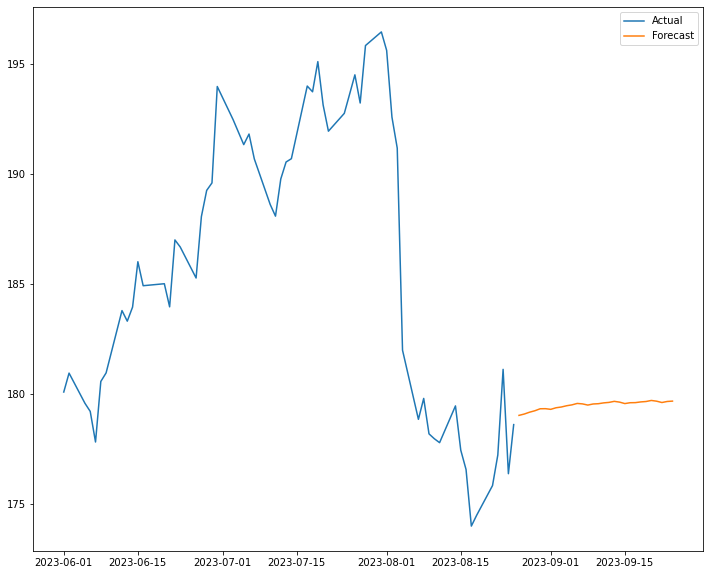

In [49]:
plt.figure(figsize=(12,10))
plt.plot(np.asarray(df[-60:]['ds']),np.asarray(df[-60:]['y']),label="Actual")
# plt.plot(np.asarray(test.index),np.asarray(test),label="Test")
plt.plot(np.asarray(y_hat['ds']),np.asarray(y_hat['yhat']),label="Forecast")
plt.legend()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

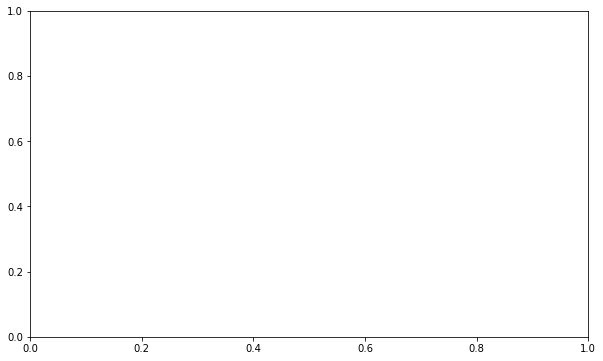

In [67]:
m.plot(np.asarray(forecast[['ds','yhat']]))

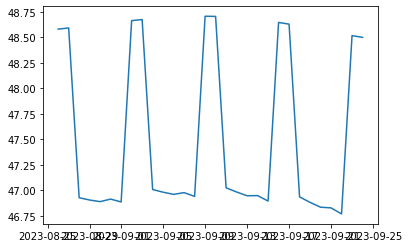

In [ ]:
plt.plot(np.asarray(forecast[-30:]['ds']),np.asarray(forecast[-30:]['yhat']))


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go
plot_components_plotly(m,forecast)